General note: the class diagram of the classes can be found at: 
https://lucid.app/lucidchart/615b8e1e-70bd-4553-b7de-0783c2ff640b/edit?viewport_loc=-825%2C-158%2C3052%2C1485%2C0_0&invitationId=inv_4526cc30-95fc-402e-89d4-6e874740c186#

Create a `vehicle2d` subclass `vehicle2d_single_track` instance with a default vehicle pose:


In [5]:
from vehicle2d_single_track import *

x = vehicle2d_single_track()

Call the `draw_vehicle()` method to perform a matplotlib-based 2D vehicle diagram drawing:

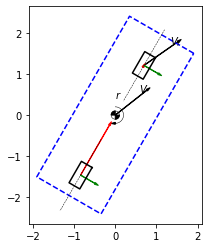

In [6]:
x.draw_vehicle() # default in SAE J670 z-down convention

In [ ]:
x.draw_vehicle(z_up=1) # switch to z-up convention

In [ ]:
# manual pose input, e.g., pose at the beginning of phase 1 in the HOTDOG-alpha drift transition
y = vehicle2d_single_track(heading=-0.45*math.pi,vel_bframe=(9.8,-4.0),whl_ang_frnt=-0.7,
                          force_front_tframe=(-1.9e3,-2.3e3),force_rear_tframe=(1.6e3,1.5e3))
y.draw_vehicle(save_fig=True)

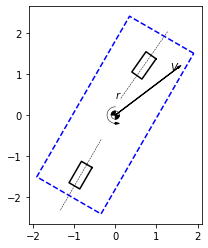

In [4]:
# manual pose input, e.g., given beta, delta, r, and V
# hide the tire force plots
delta = 5/180*math.pi
beta = 0.4
r = -0.3
V = 20
v_x = V * math.cos(beta)
v_y = V * math.sin(beta)
y = vehicle2d_single_track(vel_bframe=(v_x,v_y),whl_ang_frnt=delta,yaw_rate=r)
y.draw_vehicle(draw_front_tire_force=False,draw_rear_tire_force=False,draw_whl_v=False,save_fig=False)

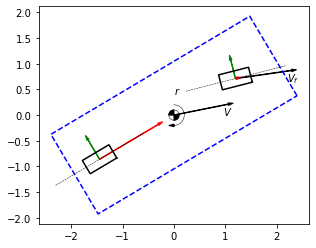

In [10]:
# automatic pose reading and plotting
from pandas import *
data = read_csv("currentPose_before_trans.csv",header=None) # the file currentPose.csv is generated from the Simulink model snapshot
p = data.iloc[0].tolist()
z = vehicle2d_single_track(heading=p[0],vel_bframe=(p[1],p[2]),whl_ang_frnt=p[3],
                          force_front_tframe=(p[4],p[5]),force_rear_tframe=(p[6],p[7]))
z.draw_vehicle()

In [ ]:
# sideslip dynamic breakdown
import warnings
warnings.filterwarnings("ignore") # ignore all warnings
from vehicle_stats_plot import *
vsp = vehicle_stats_plot()
vsp.plot_sideslip_stats(z)

### Assisting illustration with documents: mmm.mlx
For some illustrative vehicle pose in the document mmm.mlx: z-down, r>0, beta<0 significantly, vehicle is holding the curve so front wheel should be about delta_nom + alphaSL to provide maximum centrifugal force on the front.

Some examplary rough numbers: r = 0.75, beta = -0.15, V = 10, and vehicle is achieving maximum centrifugal force/acceleration with the right amount of steer and throttle (which we will determine in a next step)